In [23]:
import os
import numpy as np
import pandas as pd
from importlib import reload
from astropy.io import fits
from matplotlib import cm
from matplotlib import pyplot as plt
import matplotlib.pylab as pl
import tempfile
import imageio
from scipy import signal
from scipy.optimize import curve_fit
# super special:
import sparkles.spark as spkl
import sparkles.spark_plots as sp
# python file made for this mode
import sparkles.spark_lab as slab

# SelfRMs On the run

In [6]:
selfRM_dir = '~/data/2024A/selfRM/'
testRMs_2000_2 = selfRM_dir + 'selfRM_20240324_1564mode_2000Hz_2mod.fits'
testRMs_1800_25 = selfRM_dir + 'selfRM_20240324_1564mode_1800Hz_25mod.fits'
testRMs_1800_3 = selfRM_dir + 'selfRM_20240324_1564mode_1800Hz_3mod.fits'

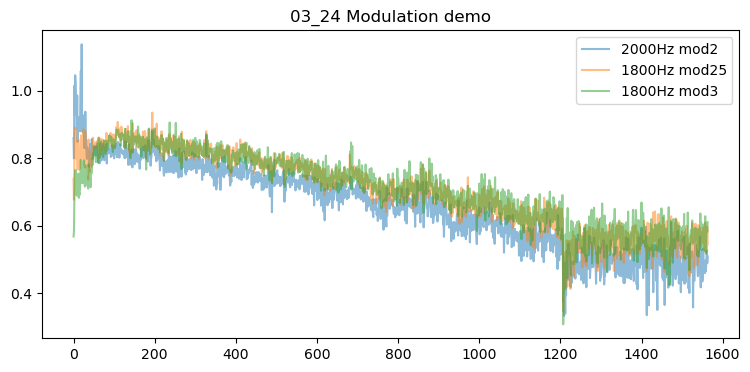

In [13]:
#look at the new selfRMs
data_2000_2 = np.diag(fits.open(testRMs_2000_2)[0].data[5])
data_1800_25 = np.diag(fits.open(testRMs_1800_25)[0].data[5])
data_1800_3 = np.diag(fits.open(testRMs_1800_3)[0].data[5])

#plot set up 
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9, 4), facecolor='white', sharex=True)

#plot it
plt.plot(data_2000_2, alpha = 0.5, label = '2000Hz mod2')
plt.plot(data_1800_25, alpha = 0.5, label = '1800Hz mod25')
plt.plot(data_1800_3, alpha = 0.5, label = '1800Hz mod3')

plt.title('03_24 Modulation demo')
plt.legend()
plt.show()


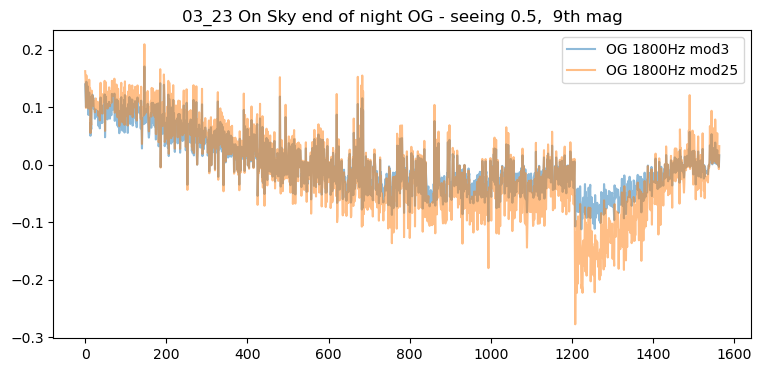

In [31]:
# divide by the other oen to check OG
skyRMs_1800 = selfRM_dir +'selfRM_20240325_alfAnt_05poke.fits'
data_sky1800= np.diag(fits.open(skyRMs_1800)[0].data[5])

#plot set up 
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9, 4), facecolor='white', sharex=True)

plt.plot(data_sky1800, alpha = 0.5, label = 'OG 1800Hz mod3')
plt.plot(data_sky1800/data_2000_2, alpha = 0.5, label = 'OG 1800Hz mod25')
#plt.ylim(0,1)


plt.title('03_23 On Sky end of night OG - seeing 0.5,  9th mag')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


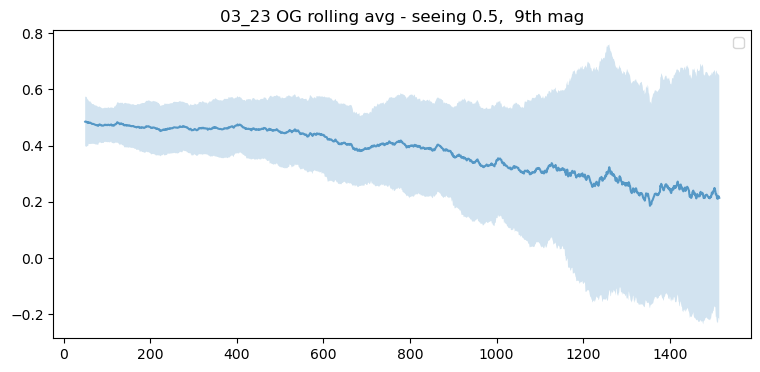

In [26]:
# roling averages: 
mean_0323, std_0323 = spkl.return_rolling(data_sky1800/data_1800_25)
X_shift = np.arange(50, mean_0323.shape[0] + 50)

#plot set up 
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9, 4), facecolor='white', sharex=True)

plt.fill_between(X_shift, mean_0323 - std_0323, mean_0323 + std_0323, alpha = 0.2,)
plt.plot(X_shift, mean_0323, alpha=0.7, )

plt.title('03_23 OG rolling avg - seeing 0.5,  9th mag')
plt.legend()
plt.show()

# SelfRMs pre-Run

In [3]:
lab_dir = '~/data/2024Aa/selfRMs/'

In [4]:
# testing SelfRMs from cleanroom tests
test_rm = lab_dir + 'selfRM_20240315_test4_recalibrated.fits'
test_old = lab_dir + 'selfRM_20240314_test3_bettergains.fits'
lab_sRM = '~/data/2023A/selfRMs/LAB/selfRM_20230311_12_LAB_spark_1800_020amps_20seps.fits'
onsky_f = '~/data/2024Aa/selfRM_20240319_bad_seeing_01amp.fits'
test_data = np.diag(fits.open(test_rm)[0].data[4])
test_old_data = np.diag(fits.open(test_rm)[0].data[4])
lab_data = np.diag(fits.open(lab_sRM)[0].data[4])
sky_data = np.diag(fits.open(onsky_f)[0].data[4])

In [18]:
# making a txt file for jared:
selfRM_array = np.array([np.diag(test_data_open.data[i]) for i in range(6)])

In [19]:
np.savetxt('selfRM_20240315_test4_recalibrated_diag.txt', selfRM_array)

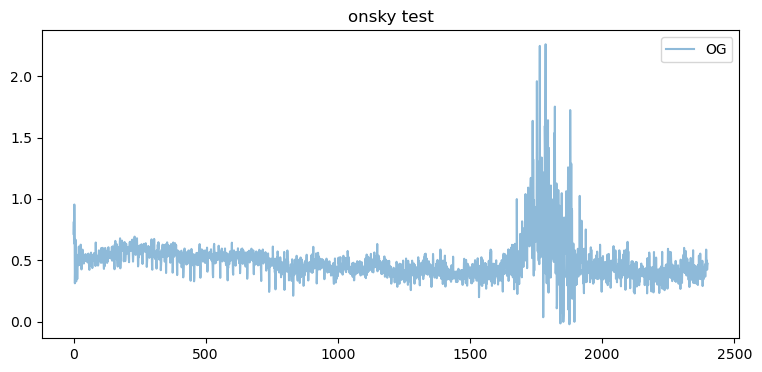

In [6]:
# plotting by modes
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9,4), facecolor='white', sharex=True)
plt.title('onsky test')
plt.plot(sky_data/test_data, alpha=0.5,  label='OG')
#plt.plot(sky_data, alpha=0.5,  label='sky')
plt.legend()
plt.show()

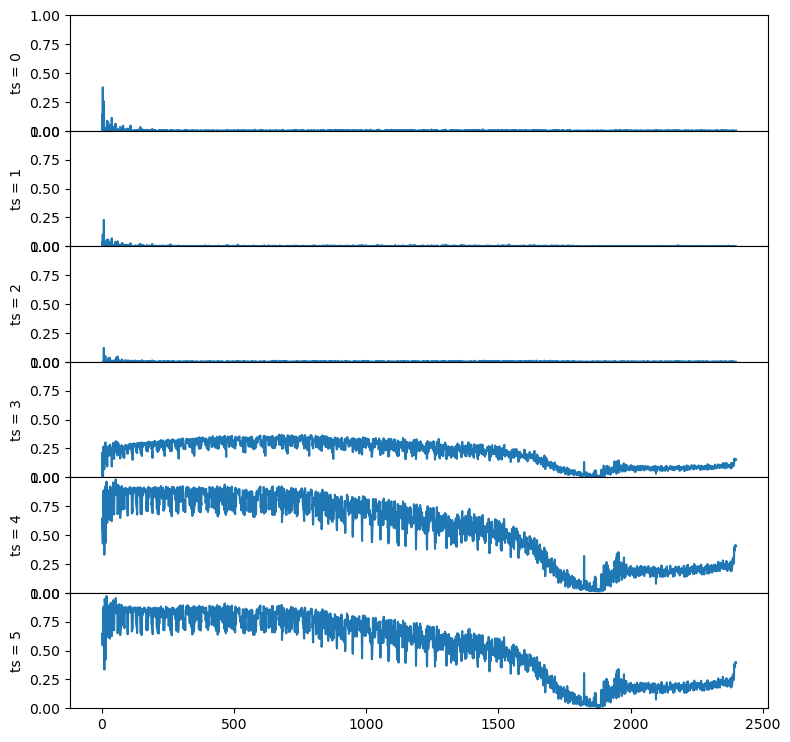

In [17]:
# PLOT for each rising time
test_data_open = fits.open(test_rm)[0]
fig, axs = plt.subplots(nrows=6, ncols=1, figsize=(9,9), facecolor='white', sharex=True)
fig.subplots_adjust(hspace=0)

for i in range(6):
    axs[i].plot(np.diag(test_data_open.data[i]))
    axs[i].set_ylim(0,1)
    axs[i].set_ylabel(f'ts = {i}')

plt.show()

Text(0.5, 1.0, '3.15 selfRM - 3.14 selfRM')

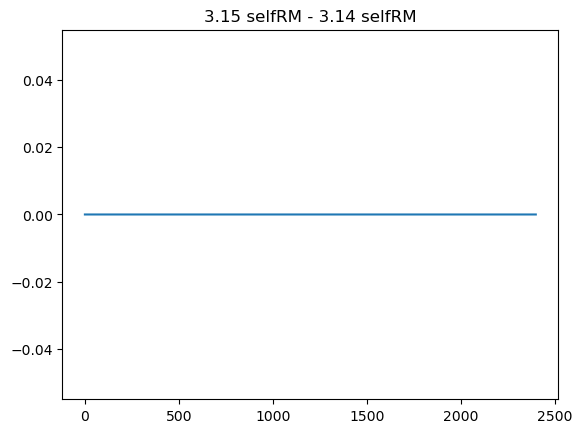

In [6]:
#difference?

plt.plot(test_data - test_old_data)
plt.title('3.15 selfRM - 3.14 selfRM')

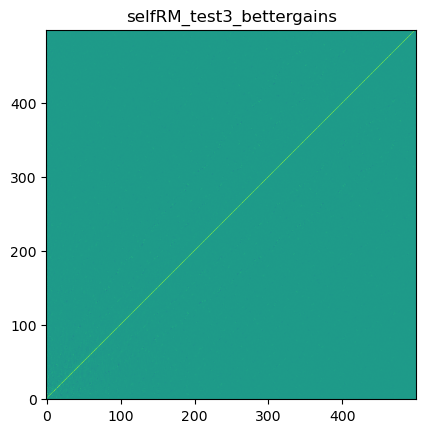

In [5]:
# plotting image cube
lab_image = fits.open(test_rm)[0].data[5]
plt.imshow(lab_image[0:500, 0:500], origin='lower')
plt.title('selfRM_test3_bettergains')
plt.show()